In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [2]:
df = DataFrame(columns=[1,2,3,4,5,6])
accnum = Series([0]*69, index=range(1,70))
accred = Series([0]*26, index=range(1,27))

with open('list.dat', 'r') as f:
    for r in f:
        readlist = r.strip().split()
        datestr = ' '.join(readlist[0:3])
        nlist = list(map(int,readlist[3:]))
        for v in nlist[:5]:
            accnum[v] += 1
        accred[nlist[5]] += 1         
        df.loc[datestr] = nlist
        

print (df)

               1   2   3   4   5   6
Feb 23, 2019   4   6  14  20  32  13
Feb 20, 2019  27  49  50  51  52   2
Feb 16, 2019  29  30  41  48  64   1
Feb 13, 2019   2   8  14  24  69  26
Feb 9, 2019    1   2   3   7  39  25
Feb 6, 2019    5  13  28  38  63  21
Feb 2, 2019   10  17  18  43  65  13
Jan 30, 2019   2  12  16  29  54   6
Jan 26, 2019   8  12  20  21  32  10
Jan 23, 2019  23  25  47  48  50  24
Jan 19, 2019   5   8  41  65  66  20
Jan 16, 2019  14  29  31  56  61   1
Jan 12, 2019   7  36  48  57  58  24
Jan 9, 2019    6  19  37  49  59  22
Jan 5, 2019    3   7  15  27  69  19
Jan 2, 2019    8  12  42  46  56  12
Dec 29, 2018  12  42  51  53  62  25
Dec 26, 2018   5  25  38  52  67  24
Dec 22, 2018  21  28  30  40  59  26
Dec 19, 2018  15  29  31  37  43  16
Dec 15, 2018   8  38  43  52  55  17
Dec 12, 2018   4   9  21  29  64  26
Dec 8, 2018   14  32  34  46  61  10
Dec 5, 2018    9  11  36  37  38  11
Dec 1, 2018   10  11  47  55  58  26
Nov 28, 2018   4  19  59  68  69  21
N

In [3]:
df.index

Index(['Feb 23, 2019', 'Feb 20, 2019', 'Feb 16, 2019', 'Feb 13, 2019',
       'Feb 9, 2019', 'Feb 6, 2019', 'Feb 2, 2019', 'Jan 30, 2019',
       'Jan 26, 2019', 'Jan 23, 2019',
       ...
       'Mar 10, 2018', 'Mar 7, 2018', 'Mar 3, 2018', 'Feb 28, 2018',
       'Feb 24, 2018', 'Feb 21, 2018', 'Feb 17, 2018', 'Feb 14, 2018',
       'Feb 10, 2018', 'Feb 7, 2018'],
      dtype='object', length=110)

In [4]:
accnum = accnum.sort_values(ascending=False)

In [8]:
accnum.index

Int64Index([56, 69, 64, 61, 27,  7,  8, 38, 41, 20, 45, 50, 23, 17,  6, 42, 43,
            25, 21, 24, 14, 29, 53, 12, 57, 59, 62,  3, 28, 19, 15, 22, 13, 10,
             9,  1, 54, 34, 55, 36, 63,  4, 44, 32, 47, 11, 39, 58,  2, 68, 65,
             5, 52, 51, 18, 67, 48, 46, 40, 37, 16, 26, 30, 31, 49, 66, 33, 60,
            35],
           dtype='int64')

In [9]:
accred = accred.sort_values(ascending=False)

# Numbers Frequencies from 2018 to now

In [10]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

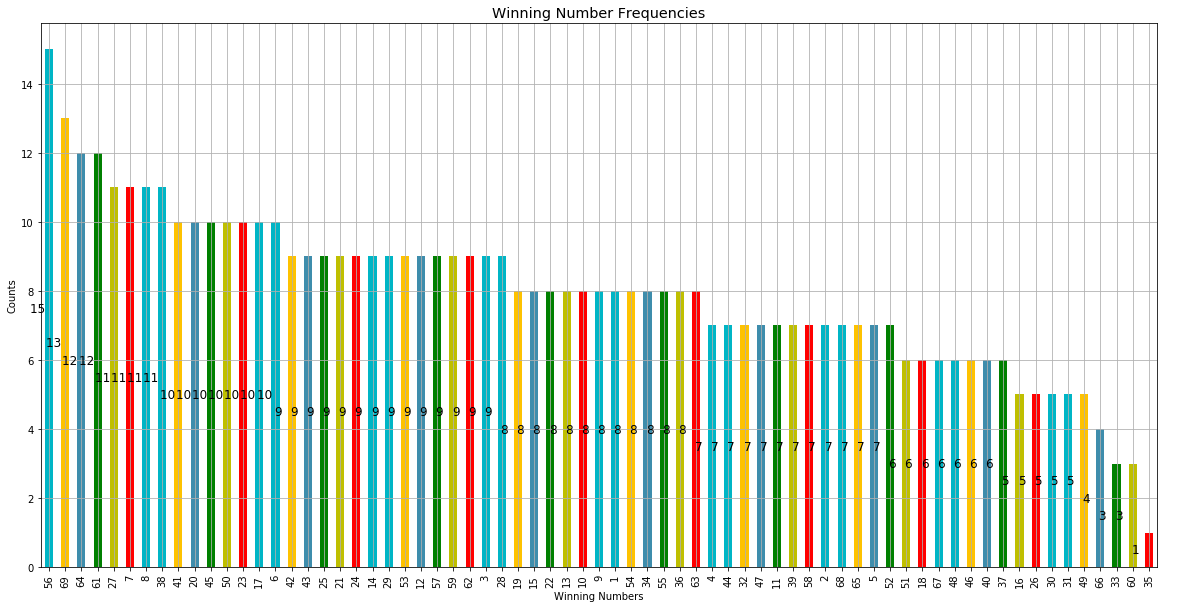

In [11]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accnum.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

# Set Graph Title, font size, and axis labes
plt.rcParams['font.size'] = 12
plt.title('Winning Number Frequencies')
ax.set_xlabel('Winning Numbers')
ax.set_ylabel('Counts')


labels = []
for i in accnum.index:
        value_str = u"{:<12,}".format(int(accnum.loc[i])) 
        labels.append(value_str)

#print labels
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/WinningNum.png')
plt.show()

In [12]:
import random

In [20]:

for i in accnum[accnum>8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum>8]:
    print ('{:2}'.format(i), end=' ')

56 69 64 61 27  7  8 38 41 20 45 50 23 17  6 42 43 25 21 24 14 29 53 12 57 59 62  3 28  
15 13 12 12 11 11 11 11 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9 

In [14]:

for i in accnum[accnum<=8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum<=8]:
    print ('{:2}'.format(i), end=' ')

19 15 22 13 10  9  1 54 34 55 36 63  4 44 32 47 11 39 58  2 68 65  5 52 51 18 67 48 46 40 37 16 26 30 31 49 66 33 60 35  
 8  8  8  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7  7  7  7  7  7  7  6  6  6  6  6  6  6  5  5  5  5  5  4  3  3  1 

# Recommendation 1

In [21]:
recomlist1 = accnum[(accnum>9)]
recomlist2 = accnum[accnum<7]
reclist = recomlist1.append(recomlist2)
for i in reclist.index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in reclist:
    print ('{:2}'.format(i), end=' ')

56 69 64 61 27  7  8 38 41 20 45 50 23 17  6 51 18 67 48 46 40 37 16 26 30 31 49 66 33 60 35  
15 13 12 12 11 11 11 11 10 10 10 10 10 10 10  6  6  6  6  6  6  6  5  5  5  5  5  4  3  3  1 

In [11]:

recval = list(reclist.index)
for i in range(5):
    print (random.sample(recval, 5))

[38, 42, 17, 7, 50]
[39, 49, 42, 32, 35]
[5, 8, 67, 23, 40]
[8, 52, 48, 60, 62]
[65, 2, 35, 30, 39]


In [12]:
print ('total Number of recommed list {:2}'.format(len(recval)))

total Number of recommed list 39


# Recommendation 2

In [13]:
# choose 2 random numbers from High frequencies ( F > 8 )
reclist1 = list(accnum[accnum>=9].index)
reclist2 = list(accnum[accnum<7].index)
reclist3 = list(accnum[(accnum>=7) & (accnum < 9)].index)
print ('F>9 list {0} '.format(reclist1) )
print ('F<7 list {0}'.format( reclist2) )
print ('7<=F<9 list {0}'.format( reclist3))

for i in range(5):
    rand1 = random.sample(reclist1, 1)
    rand2 = random.sample(reclist2, 2)
    rand3 = random.sample(reclist3, 2)
    rand = rand1 + rand2 + rand3
    rand.sort()
    print (rand)


F>9 list [56, 69, 61, 64, 27, 7, 23, 38, 45, 53, 25, 41, 42, 17, 50, 59, 6, 57, 8, 62] 
F<7 list [65, 5, 37, 39, 40, 46, 67, 52, 4, 51, 48, 31, 26, 32, 18, 66, 2, 30, 49, 16, 60, 33, 35]
7<=F<9 list [9, 3, 34, 24, 36, 22, 21, 28, 55, 43, 20, 19, 15, 10, 14, 29, 13, 12, 11, 1, 63, 58, 68, 44, 54, 47]
[3, 19, 35, 37, 50]
[28, 49, 55, 62, 66]
[5, 8, 14, 16, 55]
[9, 23, 31, 34, 40]
[4, 7, 49, 54, 63]


# Red Number Frequencies 

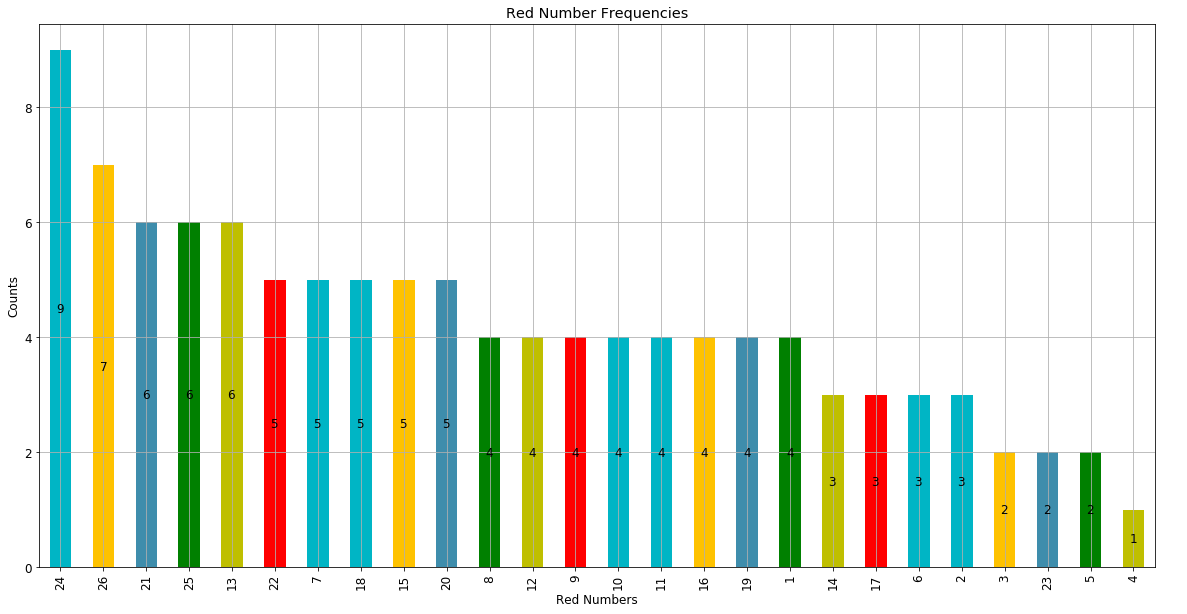

In [17]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accred.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title('Red Number Frequencies')

ax.set_xlabel('Red Numbers')
ax.set_ylabel('Counts')


labels = []

for i in accred.index:
        value_str = u"{:<12,}".format(int(accred.loc[i])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/RedNum.png')
plt.show()

In [19]:

for i in accred[accred>=5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred>=5]:
    print ('{:2}'.format(i), end=' ')

24 26 21 25 13 22  7 18 15 20  
 9  7  6  6  6  5  5  5  5  5 

In [16]:

for i in accred[accred<5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred<5]:
    print ('{:2}'.format(i), end=' ')

 8  9 11 12 13 16 19 14 10 17  1 23  6  5  3  2  4  
 4  4  4  4  4  4  4  3  3  3  3  2  2  2  2  2  1 

# Recommendation Red Numer

In [22]:
for i in range(5):
    print (random.sample(list(accred[accred>=4].index), 1))
    

[20]
[22]
[25]
[10]
[24]
